<h1><center> Supervised Machine Learning Models </center></h1>

This code is mainly designed to facilitate the process of building, evaluating, and comparing multiple machine learning models for both classification and regression tasks. By leveraging various personal and health-related details like age, gender, sports and smoking habits, chronic illnesses, we are able to either:

- **Estimate Pulse Rate (PPM)**: Using regression models.
- **Classify Heartbeat Regularity**: Using classification models to determine whether a patient's heartbeat is regular or irregular.

### **Main Functionalities:** <br> 
 
1. **Data Preparation**:

   - Cleans and prepares the dataset by encoding categorical variables and splitting the data into training and test sets.
   
   - Handles different types of target variables, whether categorical (perform classification) or continuous (perform regression).
    <br>
2. **Data Visualization**:

   - Provides visual insights into the dataset through various plots, including:
   
     - Distribution plots for categorical and numerical variables.
     
     - Box plots and scatter plots for regression analysis.
     
     - Heatmaps for confusion matrices and ROC curves for classification results.

    <br>
3. **Model Training and Evaluation**:

   - Trains a variety of machine learning models, including:
   
     - **Classification Models**: Logistic Regression, Support Vector Machines (SVM), Decision Trees, K-Nearest Neighbors (KNN), Naive Bayes, Linear Discriminant Analysis (LDA), and Quadratic Discriminant Analysis (QDA).
     
     - **Regression Models**: Multiple Linear Regression, Decision Tree Regressor, Support Vector Regressor (SVR), and K-Nearest Neighbors Regressor.
   
   - Evaluates models using appropriate metrics:
   
     - **Classification**: Accuracy, Sensitivity (Recall), Precision, and ROC-AUC.
     
     - **Regression**: Root Mean Squared Error (RMSE).
   
   - Provides visual feedback on model performance through ROC curves and scatter plots of observed vs. predicted values.
   <br>
4. **Model Comparison**:

   - Compares the performance of different models to identify the best model for predicting the target variable.
   
   - Determines the optimal model based on either highest accuracy (for classification) or lowest error (for regression).



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import statsmodels.api as sm
from statsmodels.formula.api import ols


class MachineLearningModels:
    
    def __init__(self, dataset, choice):
        self.dataset = dataset.drop(columns=['Patient'])
        self.output='PPM' if  choice=='P' else 'Beat Regularity'
        self.X = dataset.drop(columns=[self.output,'Patient'])
        self.y = dataset[self.output]
        self.background_color = '#001C30' 
        self.primary_color = '#5ec3e1'  # Light blue from the logo
        self.secondary_color = '#1f78b4'  # Dark blue from the logo
        self.colors = [self.primary_color, self.secondary_color]  # For hue-based plots
     

    
    def prepareData(self):
        
        #encode quantitative vars
        label_encoder = LabelEncoder()
        categorical = self.X.select_dtypes(include=['object']).columns
        self.X[categorical] = self.X[categorical].apply(lambda x: label_encoder.fit_transform(x))

        if(self.output=='Beat Regularity'):
            self.y=self.y.replace({'Irregular':0,'Regular':1})

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
    
    def barPlot(self,var):
        plt.figure(figsize=(10, 5))
        sns.countplot(data=self.dataset, x=var, hue=self.output, palette=self.colors)

        
        self.customize_plot(var,'Count',f'{var} Distribution by {self.output}')
        
        
    def histPlot(self,var):
        plt.figure(figsize=(10, 5))
        sns.histplot(data=self.dataset, x=var, hue=self.output, palette=self.colors)

        self.customize_plot(var,'Count',f'{var} Distribution by {self.output}')
    
    def boxPlot(self,var):
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=var, y=self.output, data=self.dataset,palette=self.colors)

        self.customize_plot(var,self.output,f'Box Plot - {self.output} by {var}')
    def scatterPlot(self,var):
        plt.figure(figsize=(10, 5))
        plt.scatter(self.X[var], self.dataset['PPM'], c=self.secondary_color)

        self.customize_plot(var,'PPM',f'Scatter Plot - {var} vs PPM')
        

    def visualizeData(self):



            # Separate categorical and numerical variables
            categorical = self.X.select_dtypes(include=['object', 'category']).columns.tolist()
            numerical = self.X.select_dtypes(include=['int', 'float']).columns.tolist()
            
            
            if(self.output=='Beat Regularity'):
            
                for var in categorical: # Bar plot for categorical variables
                    self.barPlot(var)

                for var in numerical: # Histogram for numerical variables
                    self.histPlot(var)
     
            if(self.output=='PPM'):
            
                for var in categorical: # Box plot for categorical variables
                    self.boxPlot(var)

             
                for var in numerical: #Scatter plot for numerical variables      
                    self.scatterPlot(var)
                    

    def plotHeatMap(self,yh,model):

        plt.figure(figsize=(10, 5))
        cm=pd.DataFrame(confusion_matrix(self.y_test, yh))
        cm=cm.rename(columns={0:'Irregular',1:'Regular'},index={0:'Irregular',1:'Regular'})
        sns.heatmap(cm,cmap='Blues',annot=True,cbar=True,linewidths=1.5, linecolor='white',)

        plt.xticks(color=self.background_color, fontsize=8, rotation=0, ha='center', fontweight='bold')
        plt.yticks(color=self.background_color, fontsize=8, fontweight='bold')
    
        self.customize_plot('Predicted','Observed',f'{model} Observed vs. Predicted')
        
    def plotRocCurve(self,yh,model):
       
        fpr, tpr, thresholds = roc_curve(self.y_test, yh)
        
        # Area Under Curve
        roc_auc = auc(fpr, tpr)

        # Plot curve
        plt.figure(figsize=(10, 5)) 
        plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(model, roc_auc))
        plt.plot([0,1],[0,1],color='red', linestyle='--',label='Random')
        plt.legend()
        plt.xticks(color=self.background_color, fontsize=8, rotation=0, ha='center', fontweight='bold')
        plt.yticks(color=self.background_color, fontsize=8, fontweight='bold')
        self.customize_plot('False Positive Rate','True Positive Rate',f'{model} Receiver Operating Characteristic (ROC)')
        
    def plotScatterplot(self,model,yh,rmse):

        plt.figure(figsize=(10, 5)) 
        sns.scatterplot(
            x=self.y_test, 
            y=yh, 
            label=f'RMSE: {rmse:.2f}',
            color='#5ec3e1' ,  # Use the primary color for scatter points
            edgecolor='#e74c3c'   # Optional: add edge color for better visibility
            )
        
          # Plot the reference line (ŷ = y)
        plt.plot(
            [self.y_test.min(), self.y_test.max()], 
            [self.y_test.min(), self.y_test.max()], 
            color='#e74c3c', 
            linestyle='--', 
            label='ŷ = y'
                )
        plt.legend( edgecolor='white', fontsize=10)
        
        self.customize_plot('Observed-y','Predicted-ŷ',f'{model} Observed vs. Predicted PPM values')
       
        
    def customize_plot(self, xlabel,ylabel, title):

        plt.xlabel(xlabel, color=self.background_color)
        plt.ylabel(ylabel, color=self.background_color)
        plt.title(title, color=self.background_color)
        plt.gca().set_facecolor(self.background_color)
        plt.tight_layout()
        plt.show()
        


    def ModelSummary(self,y_hat):
        
        #evaluate
        accuracy = accuracy_score(self.y_test, y_hat)   
        sensitivity = recall_score(self.y_test, y_hat)
        precision = precision_score(self.y_test, y_hat)
        
        #plotting           
        print("\033[1;34m  Model Evaluation:\033[0m")
        print(f"\tAccuracy: {accuracy*100} %")
        print(f"\tSensitivity: {sensitivity*100} %")
        print(f"\tPrecision: {precision*100} %")

#-------------------------------------------CLASSIFICATION MODELS--------------------------------------------------------------

    def LogisticRegression(self):
        
        #fit model
        regModel = LogisticRegression(random_state=0,multi_class='ovr',max_iter=1000).fit(self.X_train, self.y_train)
        #regModel=sm.Logit(self.y_train,sm.add_constant(self.X_train)).fit()

        #test model
        y_hat = regModel.predict(self.X_test)
        y_prob = np.array(regModel.predict_proba(self.X_test)[:,0])
        accuracy = accuracy_score(self.y_test, y_hat)
        
        #plotting           

        self.plotRocCurve(y_prob,'Logistic Regression') 
        self.plotHeatMap(y_hat,'Logistic Regression')
        self.ModelSummary(y_hat)
        
        return accuracy

    def LinearDiscriminantAnalysis(self):
        
        #fit model
        lda = LinearDiscriminantAnalysis()
        lda.fit(self.X_train, self.y_train)
        
        #calculating the scores
        f_scores = pd.DataFrame(lda.transform(self.X_train), columns=['F1'])
        f_scores['Beat Regularity'] = self.y_train

        # subsets of y 
        regular = f_scores[f_scores['Beat Regularity'] == 1]
        irregular = f_scores[f_scores['Beat Regularity'] == 0]
        
        #test model
        y_hat = lda.predict(self.X_test)
        y_prob=np.array(lda.predict_proba(self.X_test)[:,0])
        accuracy = accuracy_score(self.y_test, y_hat)
                
        #plotting

        plt.figure(figsize=(10, 5))
        plt.hist(regular['F1'], density=False, cumulative=False, color='#5ec3e1', alpha=0.5,    label='Regular')
        plt.hist(irregular['F1'], density=False, cumulative=False, color='#e74c3c', alpha=0.5,    label='Irregular' )
        plt.xlabel('F Score',color='white')
        plt.ylabel('Count',color='white')
        plt.title('Distribution of F Scores by Class',color='white')
        plt.gca().set_facecolor(self.background_color)
        plt.legend()
        plt.show() 
        self.plotRocCurve(y_prob,'Linear Discriminant Analysis')  
        self.plotHeatMap(y_hat,'Linear Discriminant Analysis') 
        self.ModelSummary(y_hat)
  
        return accuracy  

    def QuadraticDiscriminantAnalysis(self):
        
        #fit model
        qda = QuadraticDiscriminantAnalysis()
        qda.fit(self.X_train, self.y_train)
        
        #calculating the scores
        f_scores = pd.DataFrame(qda.decision_function(self.X_train), columns=['F1'])
        f_scores['Beat Regularity'] = self.y_train

        # subsets of y 
        regular = f_scores[f_scores['Beat Regularity'] == 1]
        irregular = f_scores[f_scores['Beat Regularity'] == 0]
                
        #test model
        y_hat = qda.predict(self.X_test)
        y_prob=np.array(qda.predict_proba(self.X_test)[:,0])
        accuracy = accuracy_score(self.y_test, y_hat)
        
        #plotting
        

        plt.figure(figsize=(10, 5))
        plt.hist(regular['F1'], density=False, cumulative=False, color='#5ec3e1', alpha=0.5,label='Regular')
        plt.hist(irregular['F1'], density=False, cumulative=False, color='#e74c3c', alpha=0.5,label='Irregular')
        plt.xlabel('F Score',color='white')
        plt.ylabel('Count',color='white')
        plt.title('Distribution of F Scores by Class',color='white')
        plt.gca().set_facecolor(self.background_color)
        plt.legend()
        plt.show() 
        self.plotRocCurve(y_prob,'Quadratic Discriminant Analysis')    
        self.plotHeatMap(y_hat,'Quadratic Discriminant Analysis') 
        self.ModelSummary(y_hat)
  
        return accuracy  

    def SVM(self):
        
        #fit model
        regModel = SVC(random_state=0,probability=True).fit(self.X_train, self.y_train)
        
        #test model
        y_hat = regModel.predict(self.X_test)
        y_prob=np.array(regModel.predict_proba(self.X_test)[:,0])
        accuracy = accuracy_score(self.y_test, y_hat)
        #plotting       

        self.plotRocCurve(y_prob,'Support Vector Machine')
        self.plotHeatMap(y_hat,'Support Vector Machine')
        self.ModelSummary(y_hat)  

        return accuracy
    
    def NaiveBayes(self):
        
        #fit model
        regModel = GaussianNB().fit(self.X_train, self.y_train)
        
        #test model
        y_hat = regModel.predict(self.X_test)
        y_prob=np.array(regModel.predict_proba(self.X_test)[:,0])
        accuracy = accuracy_score(self.y_test, y_hat)

        #plotting         

        self.plotRocCurve(y_prob,'Naive Bayes')  
        self.plotHeatMap(y_hat,'Naive Bayes')
        self.ModelSummary(y_hat)  
        
        return accuracy
    
    def KNNC(self):
        
        #fit model
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(self.X_train, self.y_train)

        #test model
        y_hat = knn.predict(self.X_test)
        y_prob = knn.predict_proba(self.X_test)[:, 1]
        accuracy = accuracy_score(self.y_test, y_hat)

        # Plotting
        self.plotRocCurve(y_prob, 'KNN')
        self.plotHeatMap(y_hat, 'KNN')
        self.ModelSummary(y_hat) 
        
        return accuracy

    
    def CARTtreeC(self):
        
        #fit model
        regModel = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=5,
                                         min_samples_split=3, min_samples_leaf=2, 
                                         min_weight_fraction_leaf=0, max_leaf_nodes=10, 
                                         min_impurity_decrease=0,class_weight=None).fit(self.X_train, self.y_train)
                                       
        
        #test model
        y_hat = regModel.predict(self.X_test)
        y_prob=np.array(regModel.predict_proba(self.X_test)[:,0])
        accuracy = accuracy_score(self.y_test, y_hat)
        
        
        plt.figure(figsize=(12, 6))
        plot_tree(
            regModel, 
            feature_names=self.X.columns, 
            filled=True, 
            rounded=True, 
            impurity=False,  
            class_names=['Irregular', 'Regular'],  
        )
        

        plt.title('Decision Tree', color=self.background_color)

        plt.show()

        self.plotRocCurve(y_prob,'CART Tree')    
        self.plotHeatMap(y_hat,'CART Tree') 
        self.ModelSummary(y_hat)
        
        return accuracy
     
    #-------------------------------------------REGRESSION MODELS------------------------------------------------  
    
    def MultiLinearRegression(self):
        
        #fit model
        regModel = sm.OLS(self.y_train, sm.add_constant(self.X_train)).fit()
        
        #test model
        y_hat = regModel.predict(sm.add_constant(self.X_test))
        rmse = np.sqrt(mean_squared_error(self.y_test, y_hat))
        
        #plotting results
        self.plotScatterplot('MultiLinear Regression',y_hat,rmse)

        return rmse 
        
    def SVR(self):
        
        #fit model
        regModel = SVR().fit(self.X_train, self.y_train)
        
        #test model
        y_hat = regModel.predict(self.X_test)
        rmse = mean_squared_error(self.y_test, y_hat, squared=False)

        #plotting results
        self.plotScatterplot('Support Vector Machine',y_hat,rmse)
        
        return rmse
    
    def CARTtreeR(self):
        
        #fit model
        regModel = DecisionTreeRegressor(criterion='friedman_mse', splitter='best',max_depth=4,
                                         min_samples_split=50, min_samples_leaf=10, 
                                         min_weight_fraction_leaf=0.0, max_features=None, 
                                         random_state=None, max_leaf_nodes=None, 
                                         min_impurity_decrease=0.0,ccp_alpha=0.0).fit(self.X_train, self.y_train)


        #test model
        y_hat = regModel.predict(self.X_test)
        rmse = mean_squared_error(self.y_test, y_hat, squared=False)
        
        #plot tree
        #plt.figure(figsize=(12, 6))
        #plot_tree(
        #    regModel, 
        #    feature_names=self.X.columns, 
        #    filled=True, 
        #    rounded=True,  # Better aesthetics with rounded boxes
         #   impurity=False  # Optional: omit impurity from display for clarity
          #  )
        
        #plt.title('Decision Tree ', color=self.background_color)
        #plt.show()
                   
        #plotting results
        self.plotScatterplot('CART Tree',y_hat,rmse)

        return rmse
    
    def KNNR(self):
        
        #fit model
        regModel = KNeighborsRegressor(n_neighbors=5).fit(self.X_train, self.y_train)

        #test model
        y_hat = regModel.predict(self.X_test)
        rmse = mean_squared_error(self.y_test, y_hat, squared=False)
                   
        #plotting results

        self.plotScatterplot('KNN',y_hat,rmse)
        
        return rmse
    
    
    def getModels(self):
        
        #classification models for dichotomous output
        if(self.output=='Beat Regularity'):

            models = {
                'Logistic Regression': self.LogisticRegression(),
                'Support Vector Machine': self.SVM(),
                'Naive Bayes': self.NaiveBayes(),
                'KNN': self.KNNC(),
                'CART Tree': self.CARTtreeC(),
                'Linear Discriminant Analysis': self.LinearDiscriminantAnalysis(),
                'Quadratic Discriminant Analysis': self.QuadraticDiscriminantAnalysis()
                }
            
        #regression models for quantitative output    
        else:
            models = {
                'Linear Regression': self.MultiLinearRegression(),
                'CART Tree': self.CARTtreeR(),
                'Support Vector Machine': self.SVR(),
                'KNN': self.KNNR(),
            }
            
        return models

    def compare_models(self):
        

        self.prepareData() #encoding and splitting
        models=self.getModels() #either classification or regression
        
        print("")    
        print("\033[1;34m Comparing Models\033[0m")
        
        #Classification: check highest accuracy
        if(self.output=='Beat Regularity'): 
            print("\033[31m\tClassification Accuracy:\033[0m")
            for model, accuracy in models.items():
                print(f"\t{model}: {accuracy*100} %")
                best=max(models, key=models.get)
            
        #Regression: check lowest error
        if(self.output=='PPM'):
            print("\033[31m\tRoot Mean Squared Error:\033[0m")
            for model, rmse in models.items():
                print(f"\t{model}: {rmse}")
                best=min(models, key=models.get)

        # Conclusion
        print(f"\033[1;34m  Best Model to predict {self.output}:\033[0m {best} ")





In [2]:
pulse=pd.read_excel(r'Pulse.xlsx.')
pulse.rename(columns={'Sports activity':'Sports','Pulse Per Minute':'PPM'
                 },inplace = True)
pulse=pd.DataFrame(data=pulse)
print(pulse.head())

   Patient  Gender    Age Sports Smoker  Illness  PPM Beat Regularity  \
0        1    Male  13-45    Yes    Yes  Cardiac  100         Regular   
1        2    Male  13-45    Yes    Yes  Cardiac   45       Irregular   
2        3  Female   > 45     No    Yes  Cardiac   85         Regular   
3        4  Female   > 45     No     No  Cardiac   75       Irregular   
4        5  Female   > 45     No    Yes  Cardiac   89         Regular   

   Respiratory Rate  Lower Tension  Upper Tension  Temperature Place of Living  
0                18            9.5           17.5         37.0           North  
1                16            3.5            6.5         36.2           North  
2                20            9.5           14.5         36.5           North  
3                16            6.5           12.5         37.8           North  
4                22            8.5           16.5         38.0           North  


# Comparing Regression Models on Pulse Rate (Quantitative)

## Visualizing Pulse Rate distirubition

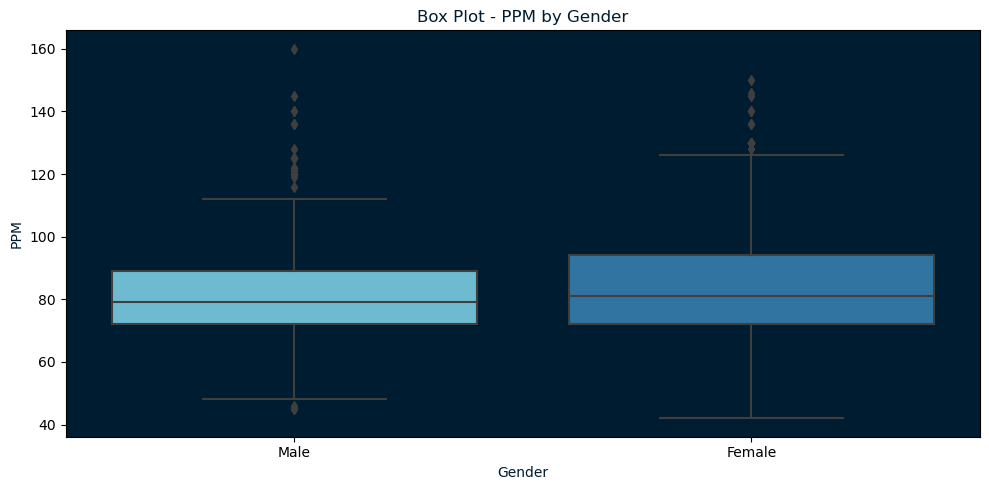

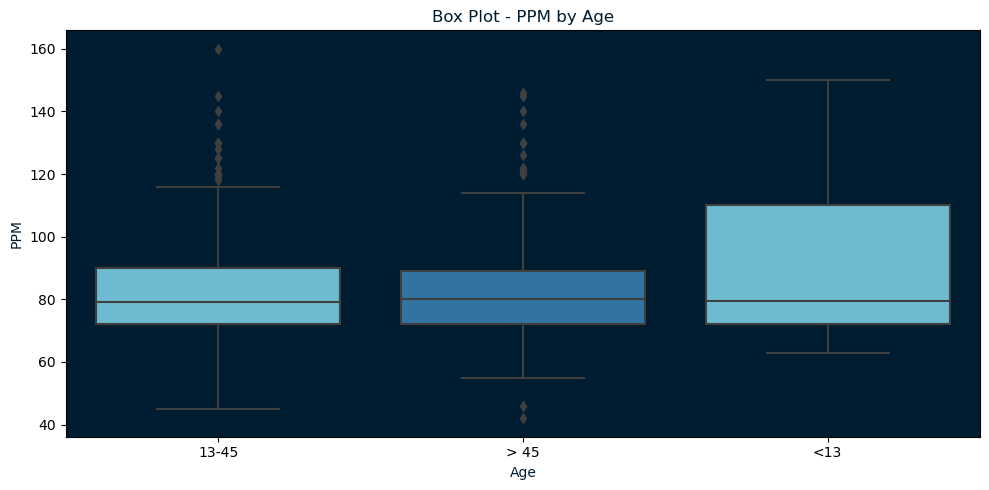

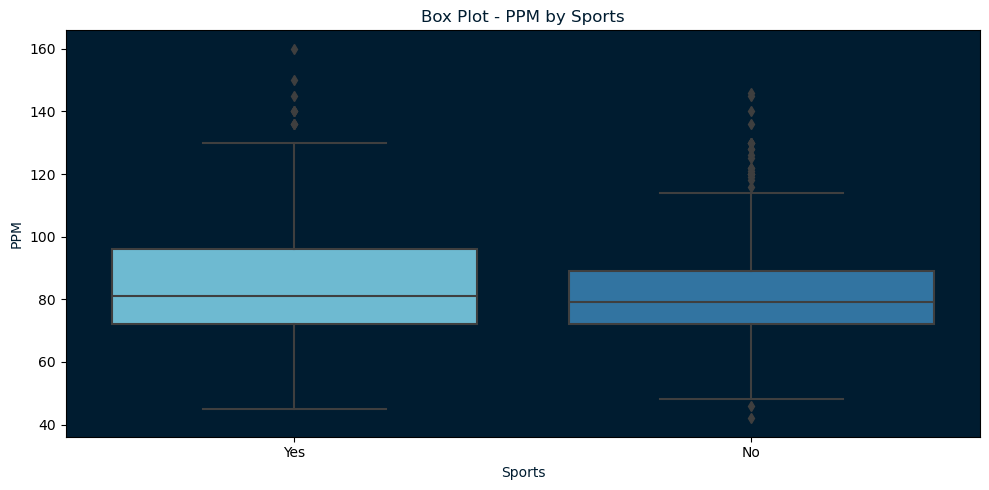

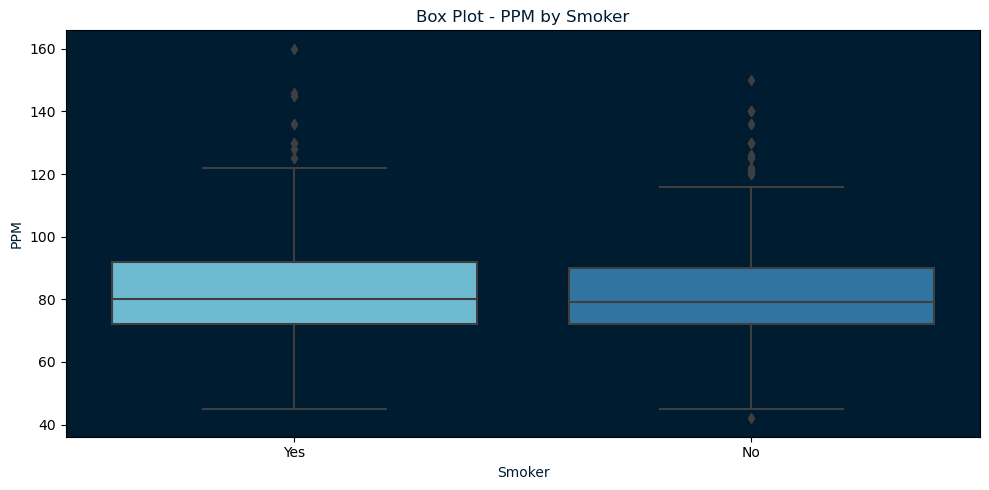

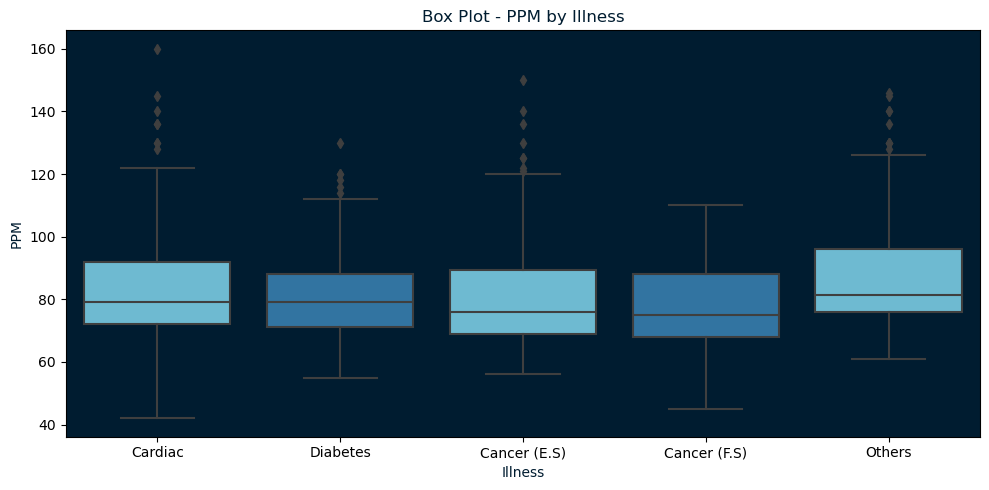

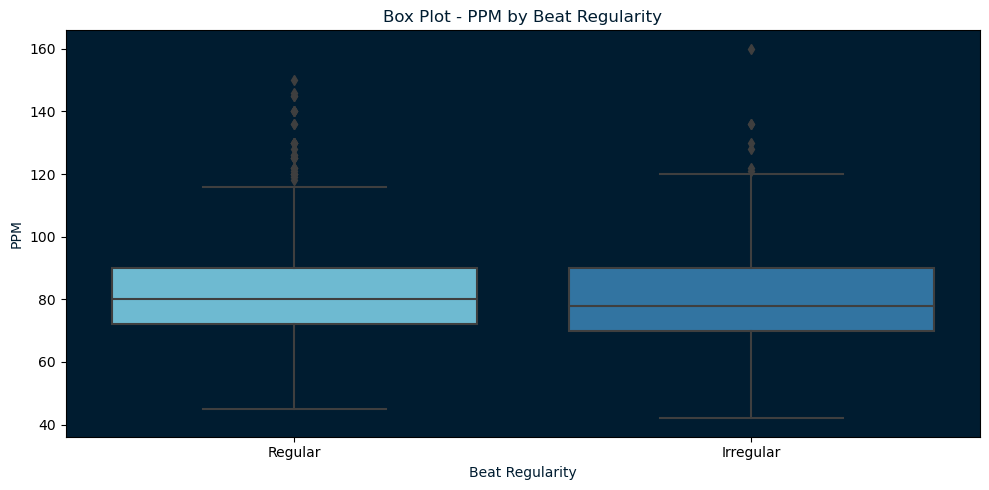

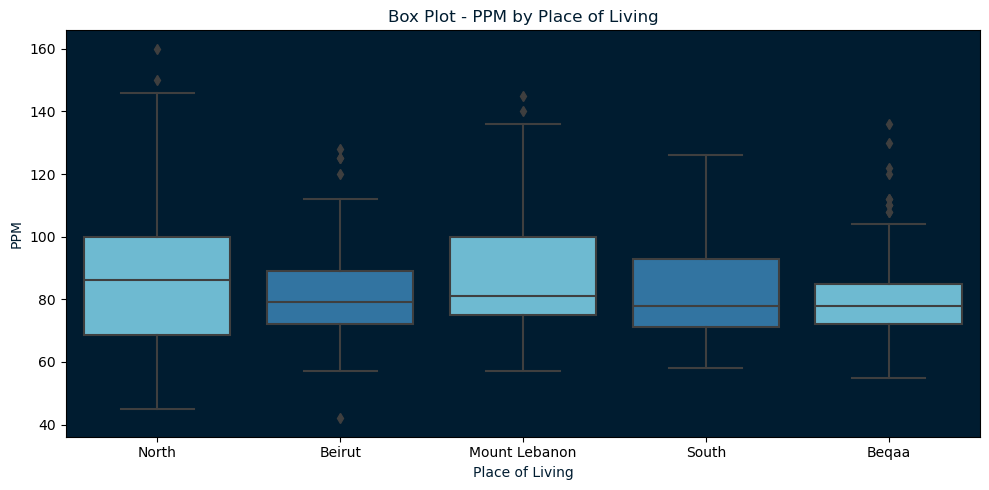

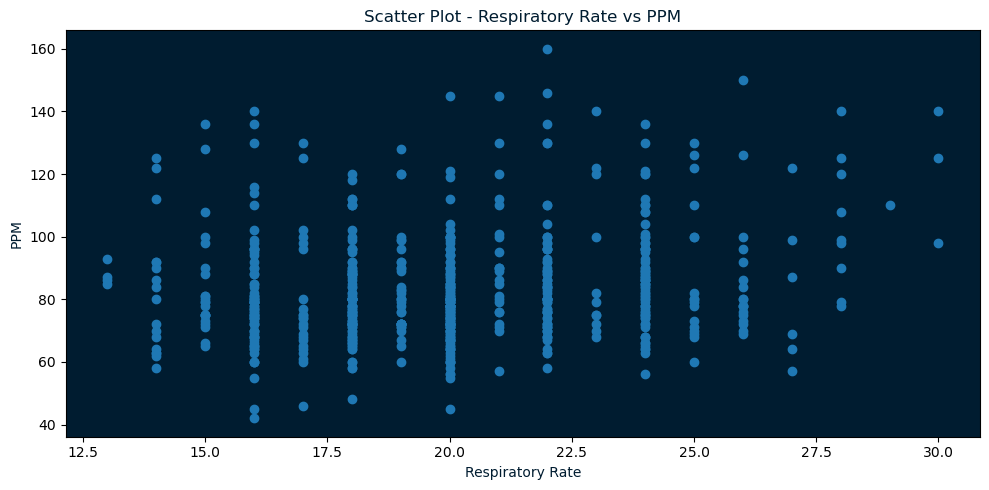

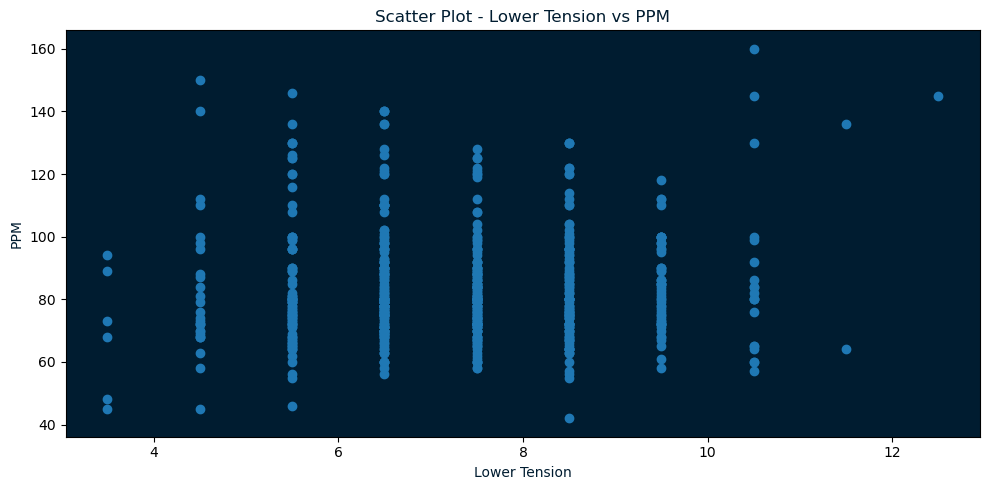

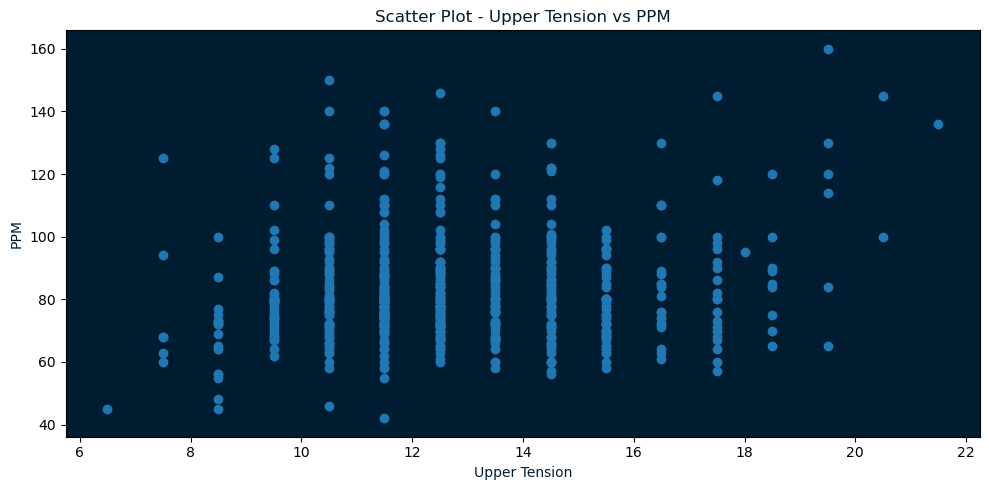

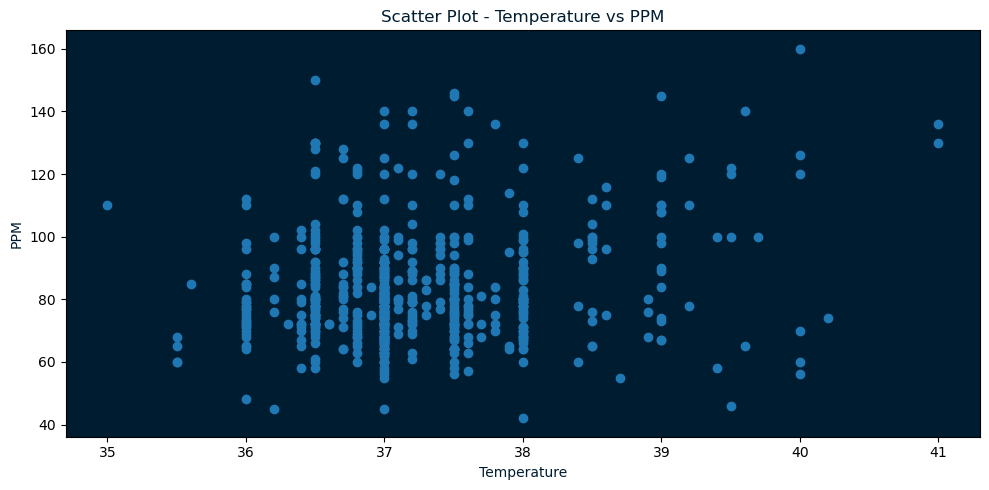

In [3]:
mymodel= MachineLearningModels(pulse,'P')
mymodel.visualizeData()

## Comparing different regression models on Root Mean Squared Error (RMSE)

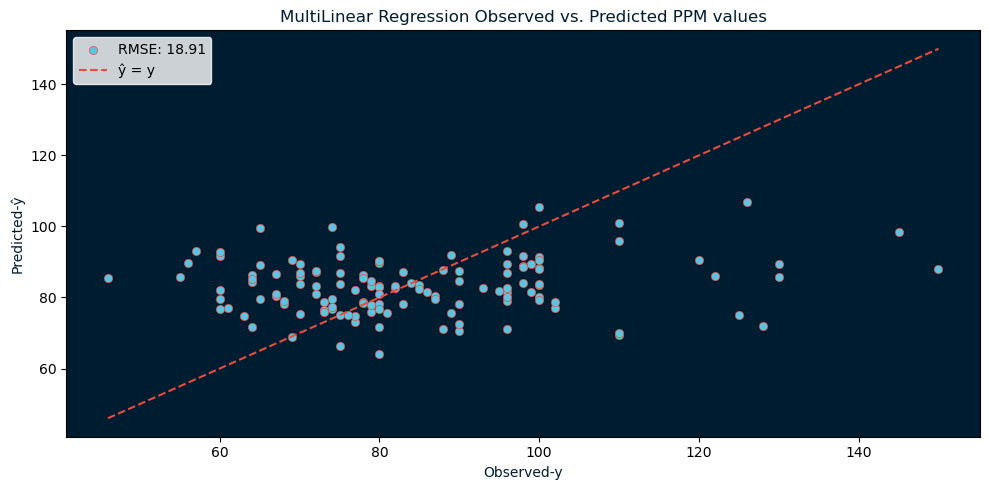

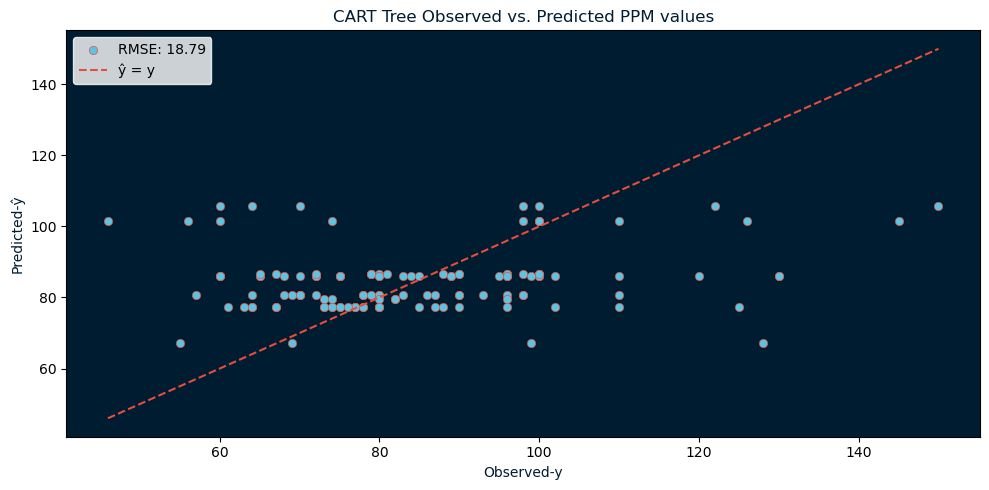

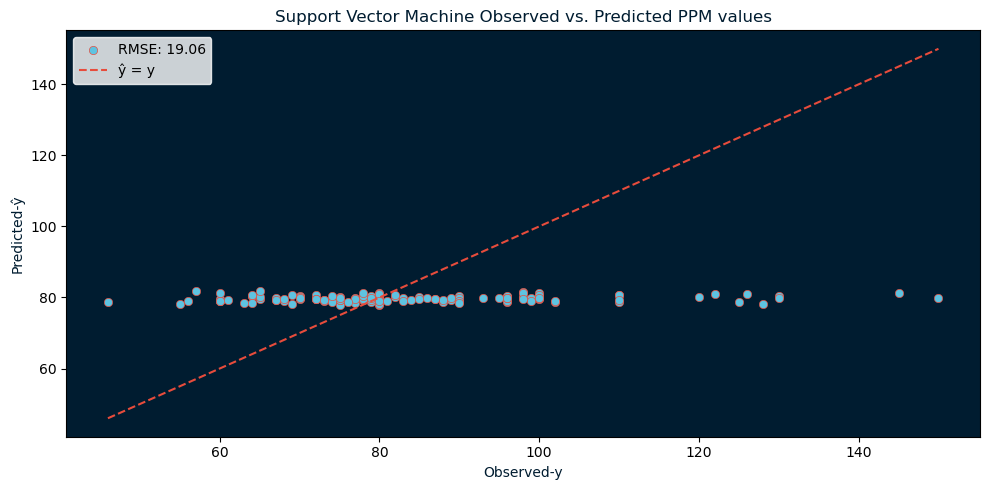

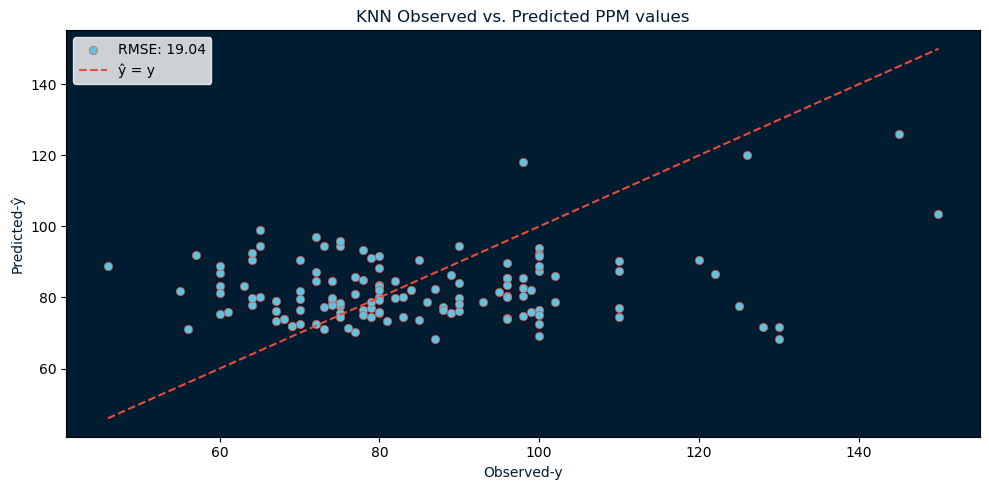


 Comparing Models
	Root Mean Squared Error:
	Linear Regression: 18.912353760806656
	CART Tree: 18.785779702935017
	Support Vector Machine: 19.060827185073407
	KNN: 19.04108917375991
  Best Model to predict PPM: CART Tree 


In [4]:
mymodel.compare_models()

# Comparing Classification Models on Beat Regularity (Qualitative)

##  Visualizing Beat Regularity ( Regular-Irregular) distirubition

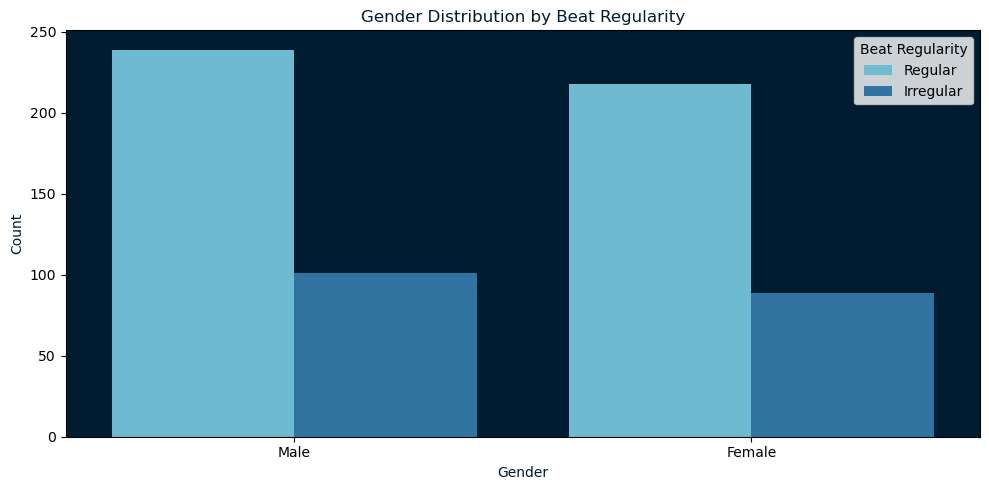

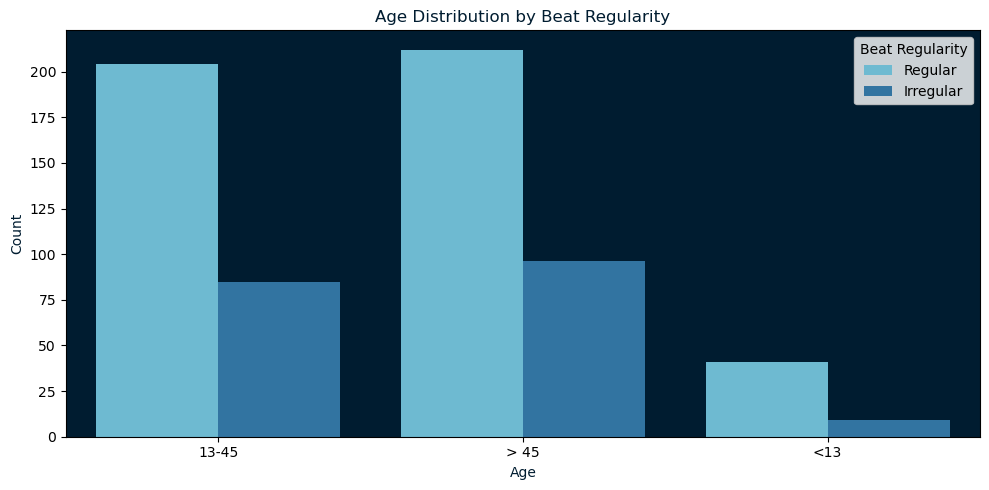

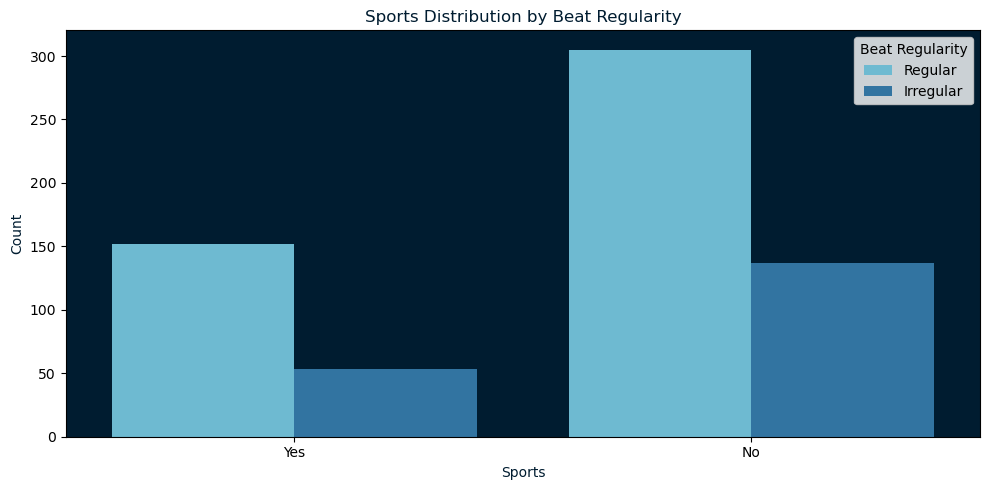

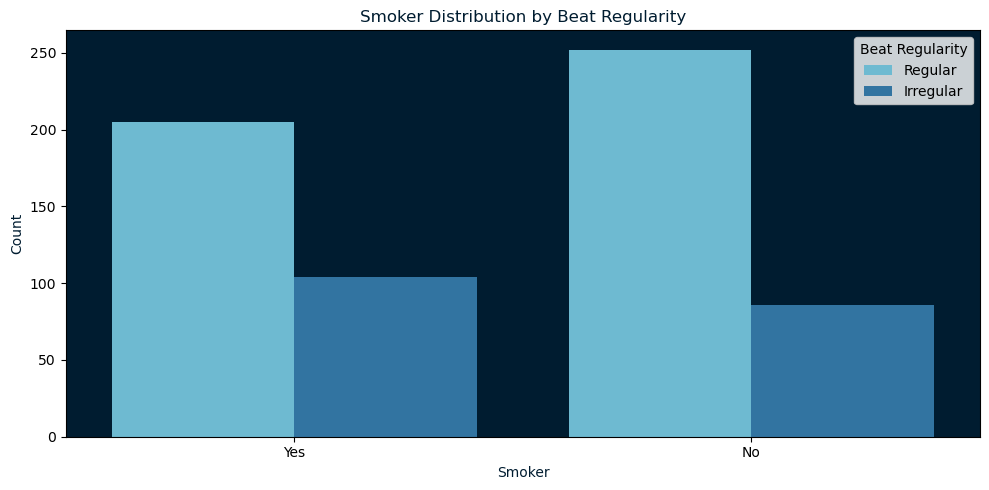

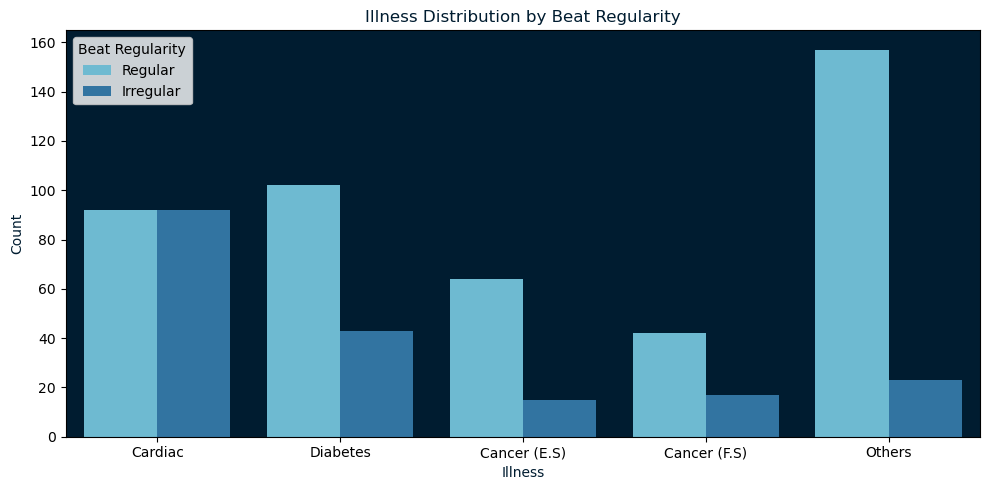

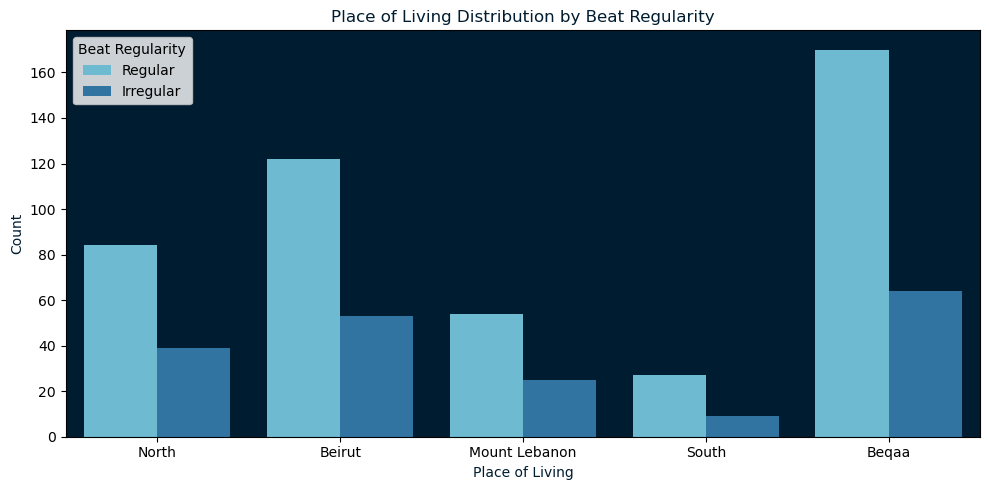

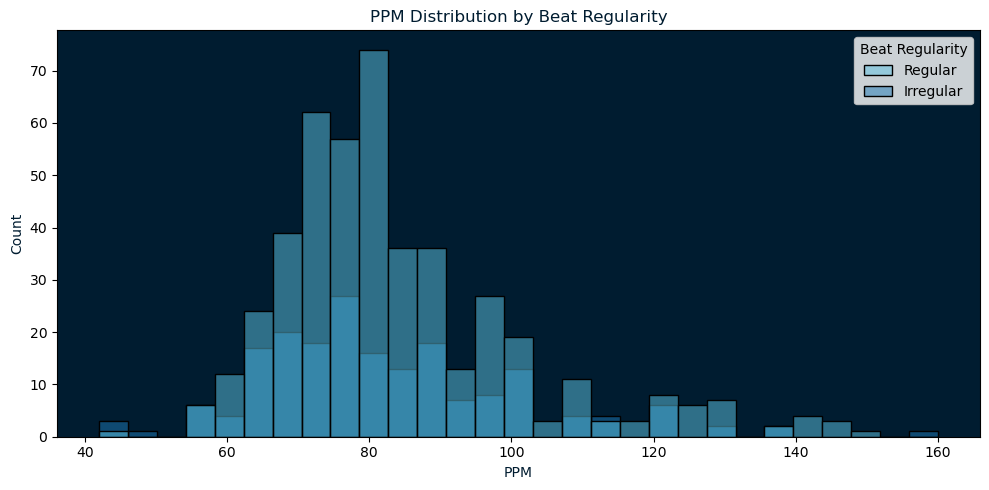

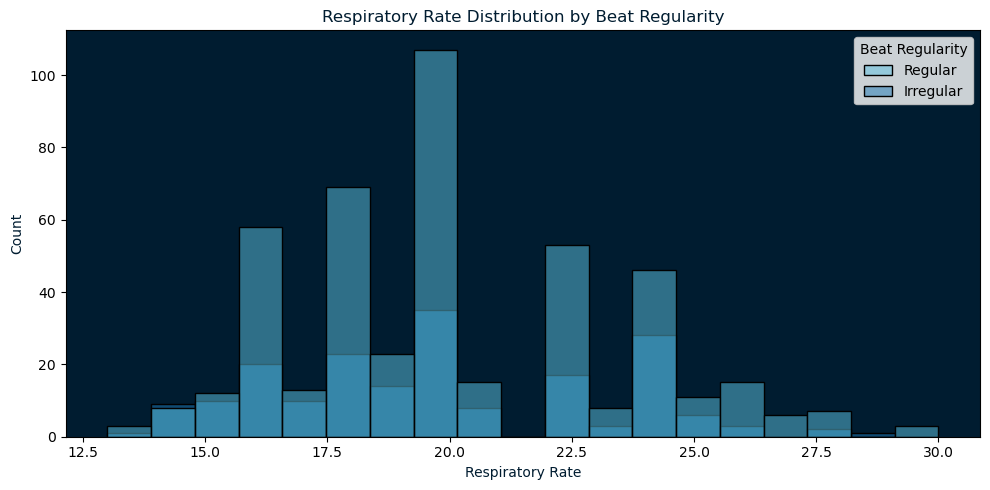

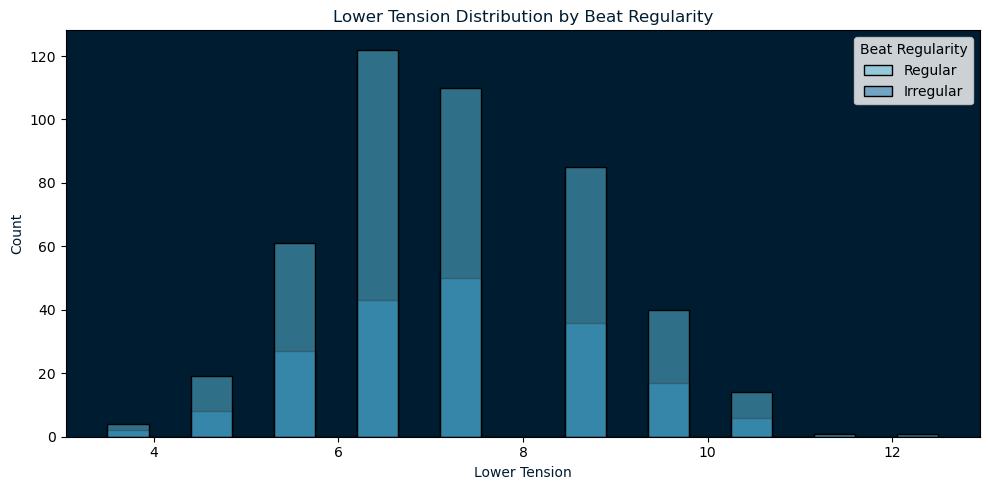

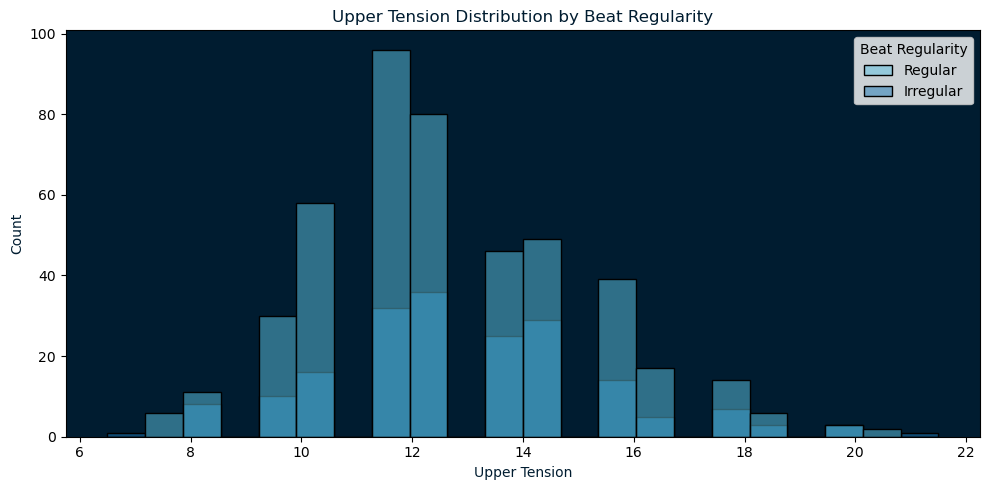

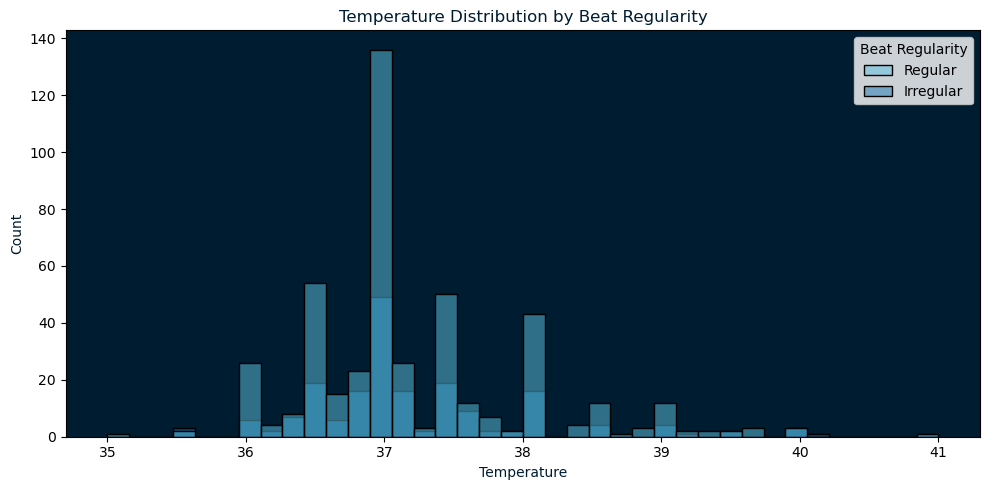

In [5]:
mymodel= MachineLearningModels(pulse,'B')
mymodel.visualizeData()

## Comparing different classification models on accuracy% 

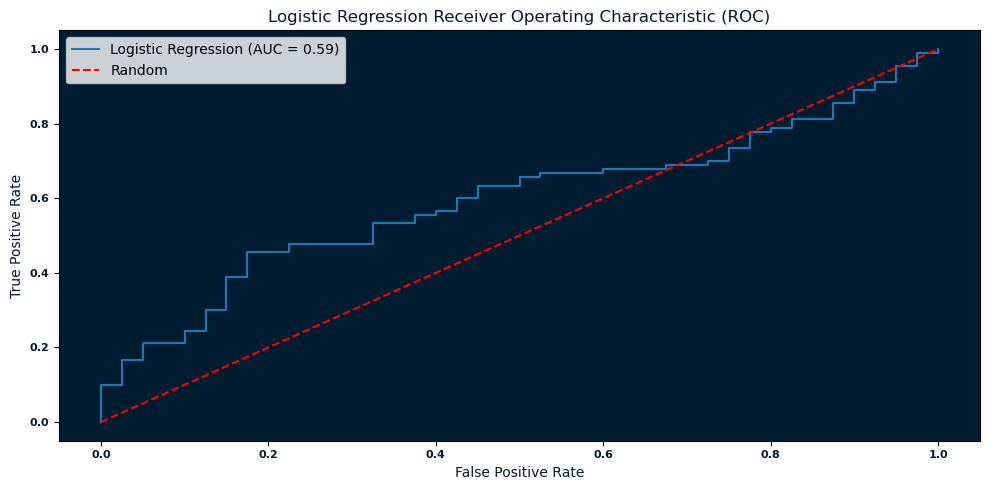

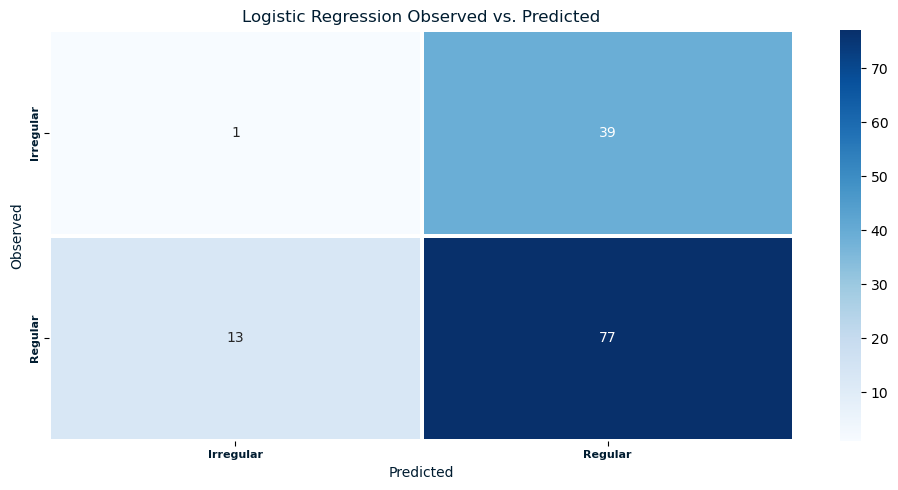

  Model Evaluation:
	Accuracy: 60.0 %
	Sensitivity: 85.55555555555556 %
	Precision: 66.37931034482759 %


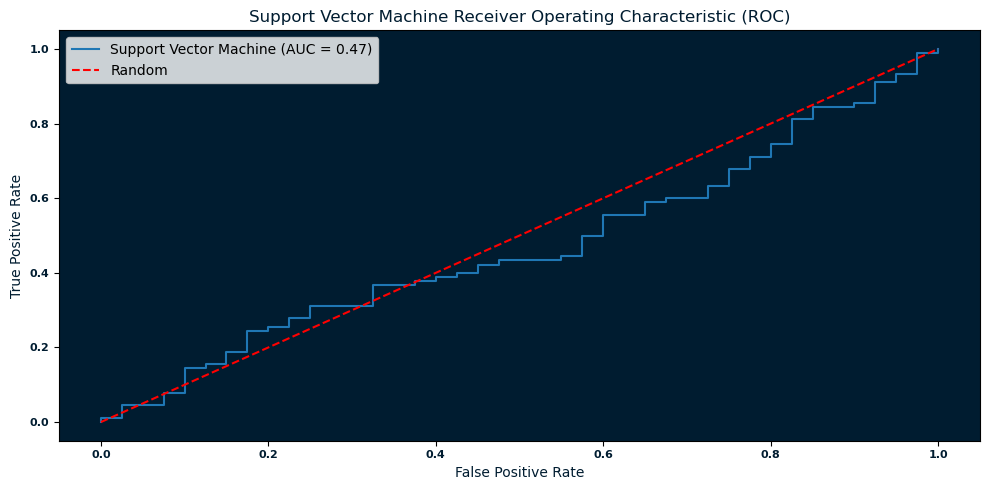

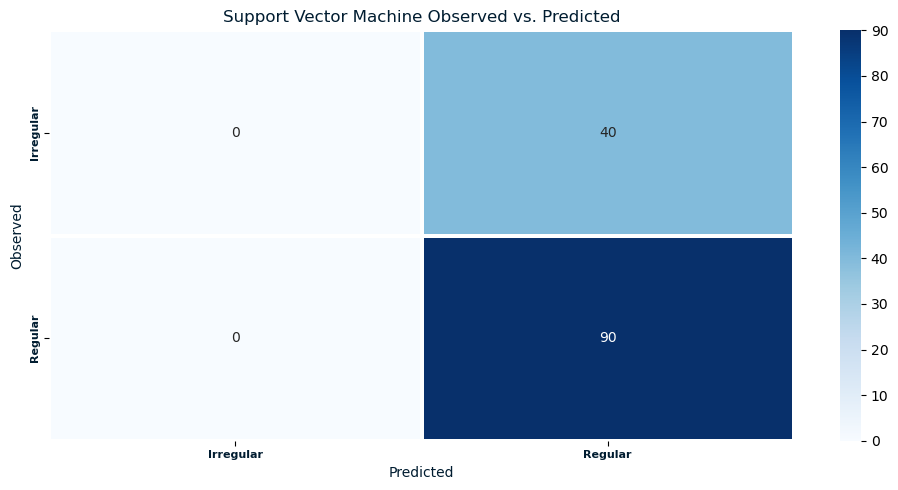

  Model Evaluation:
	Accuracy: 69.23076923076923 %
	Sensitivity: 100.0 %
	Precision: 69.23076923076923 %


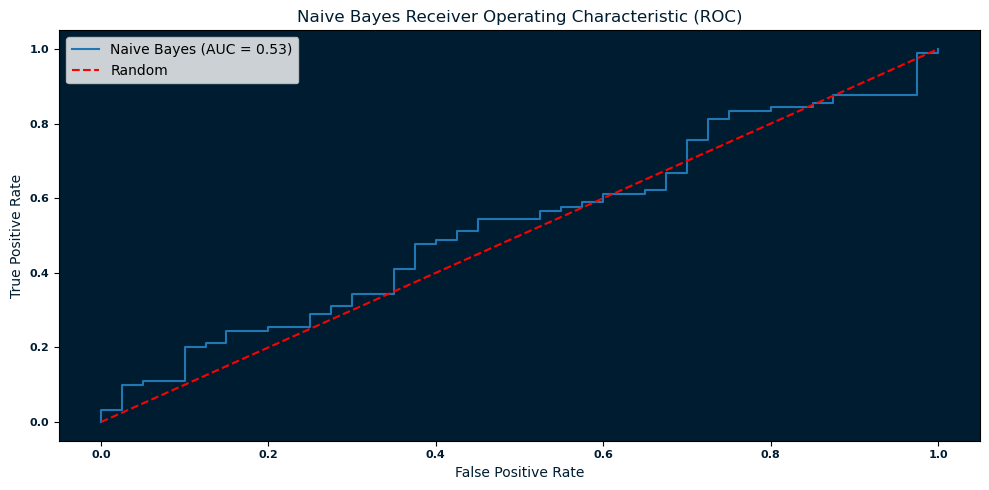

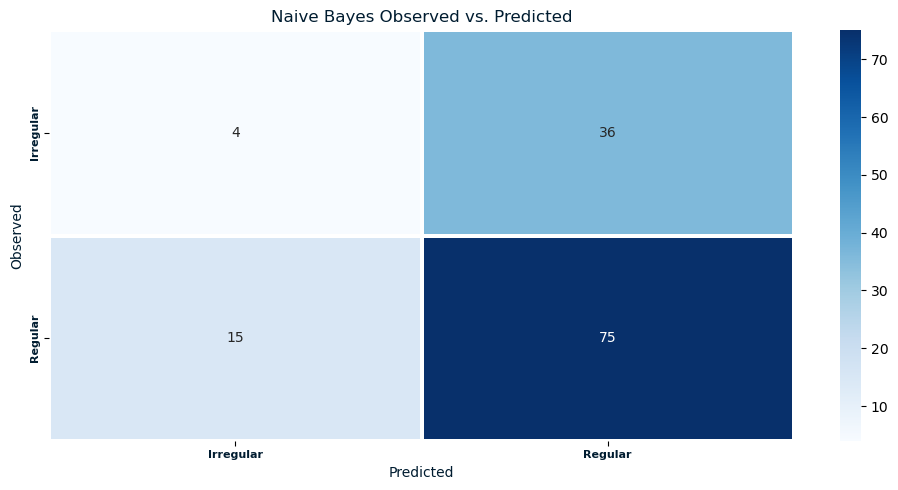

  Model Evaluation:
	Accuracy: 60.76923076923077 %
	Sensitivity: 83.33333333333334 %
	Precision: 67.56756756756756 %


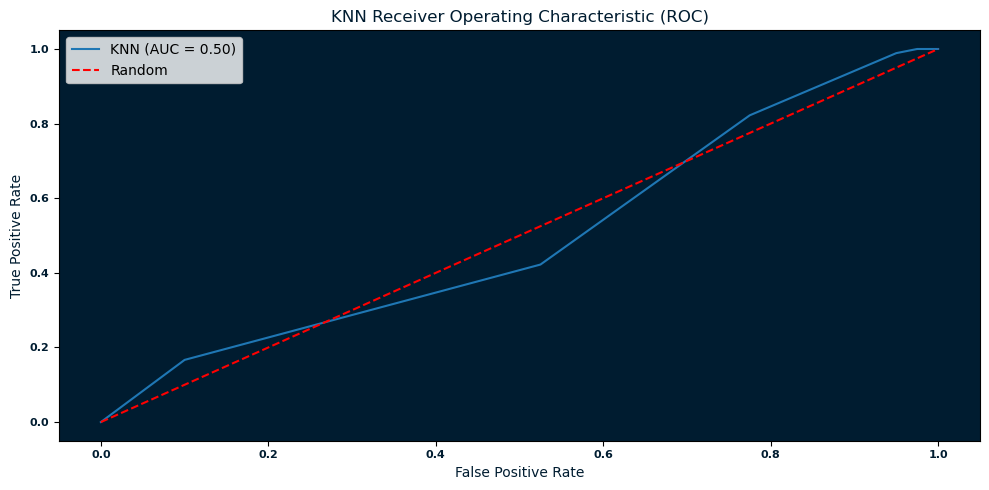

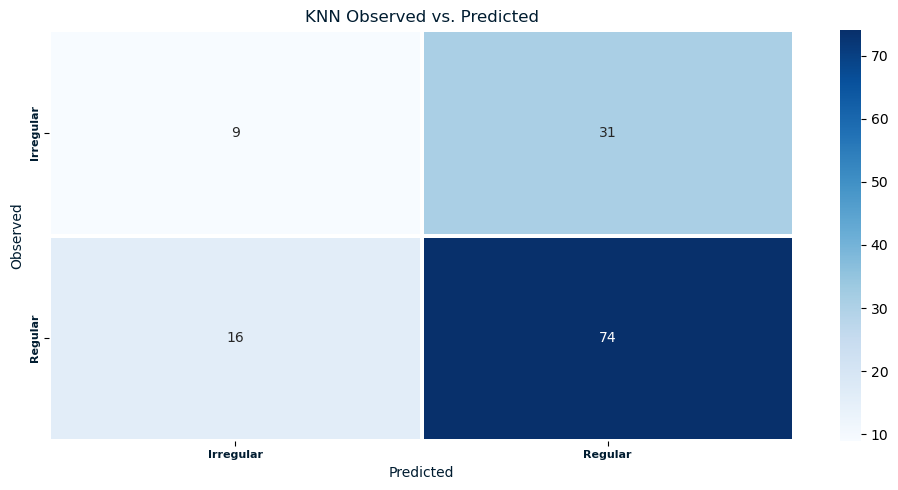

  Model Evaluation:
	Accuracy: 63.84615384615384 %
	Sensitivity: 82.22222222222221 %
	Precision: 70.47619047619048 %


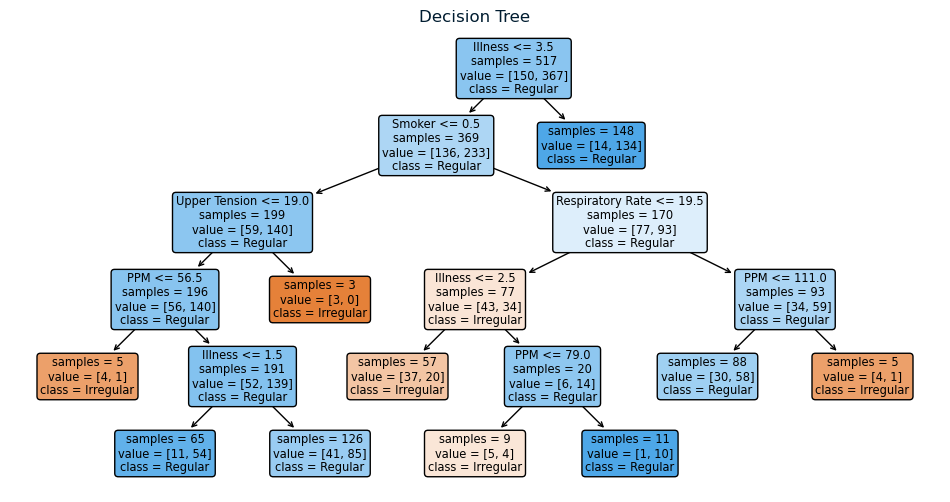

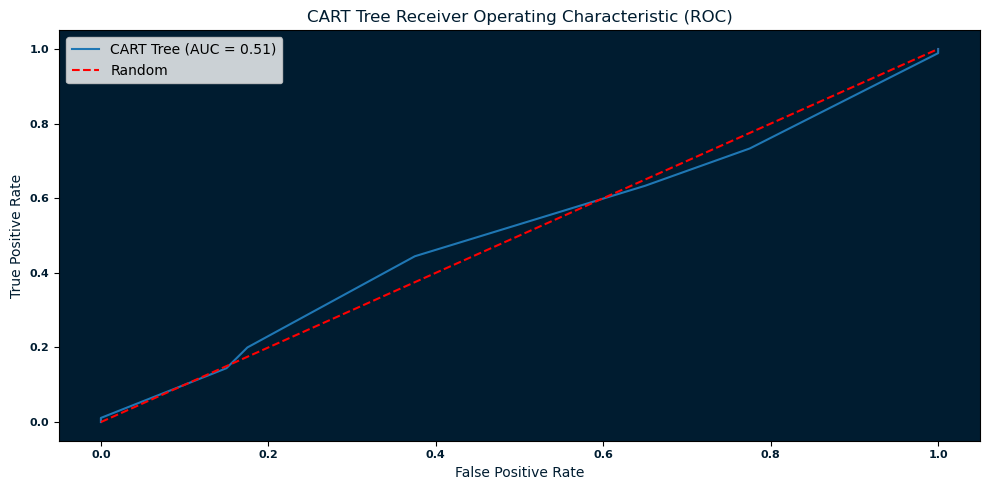

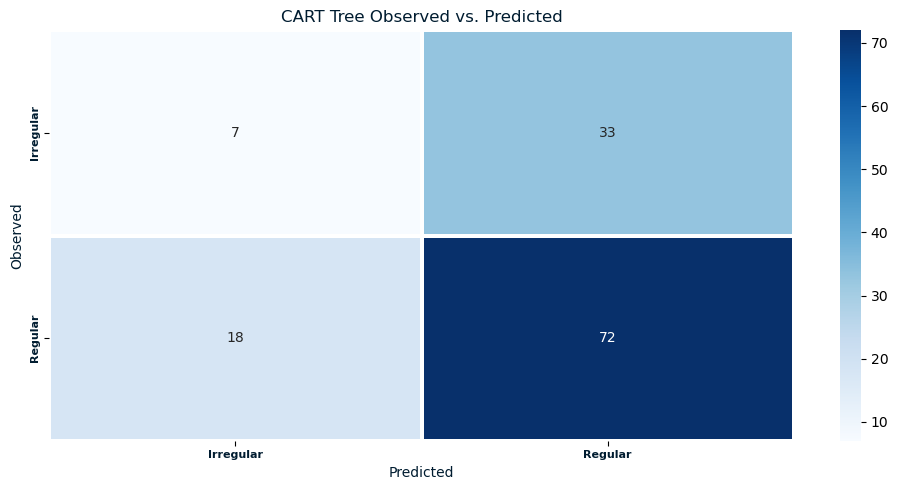

  Model Evaluation:
	Accuracy: 60.76923076923077 %
	Sensitivity: 80.0 %
	Precision: 68.57142857142857 %


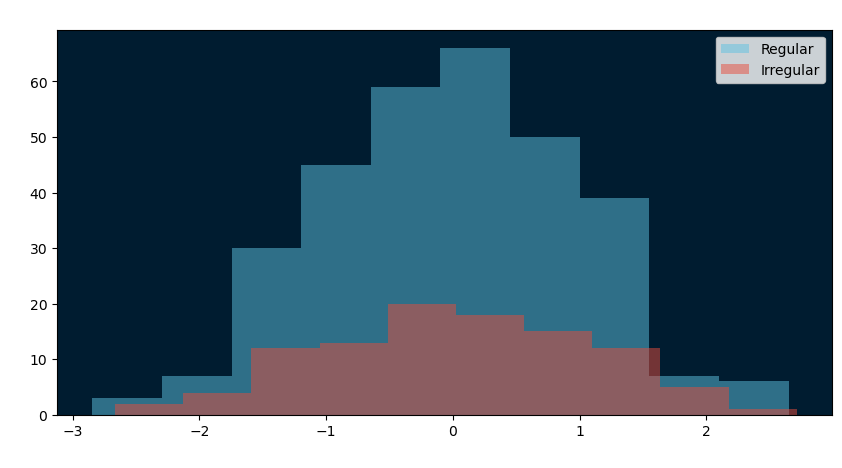

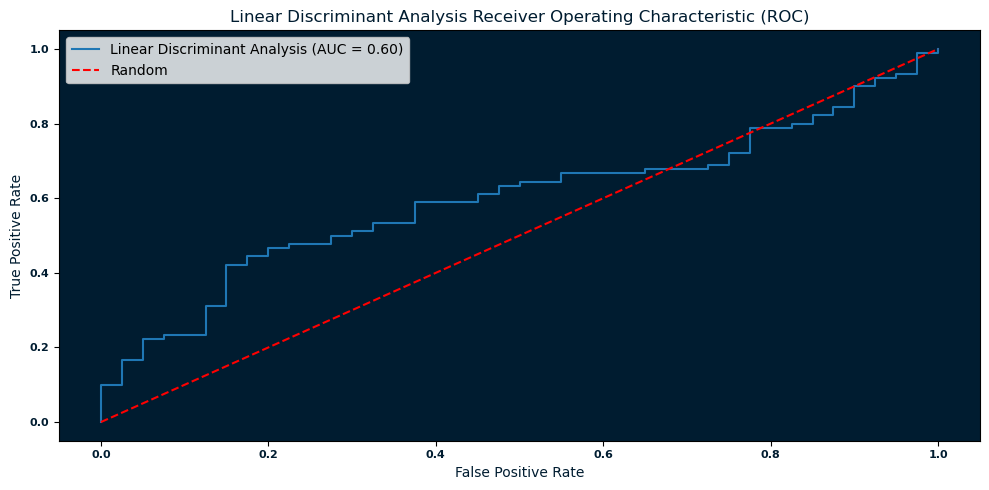

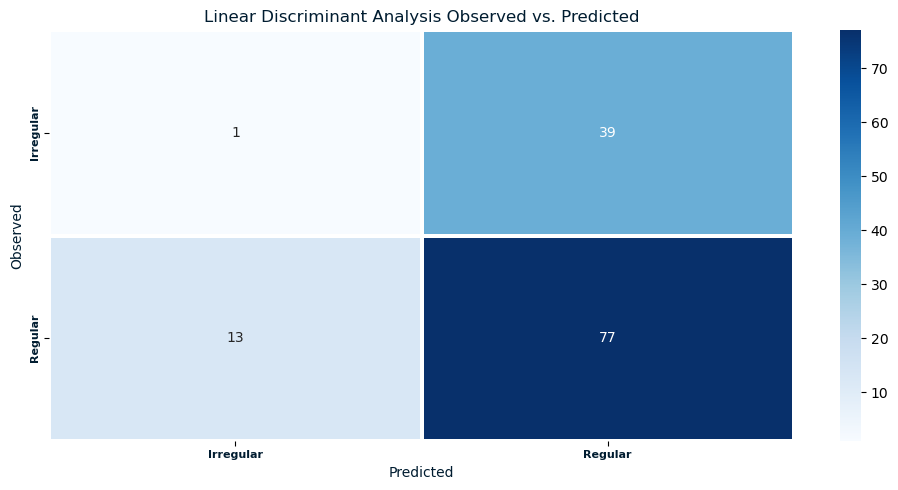

  Model Evaluation:
	Accuracy: 60.0 %
	Sensitivity: 85.55555555555556 %
	Precision: 66.37931034482759 %


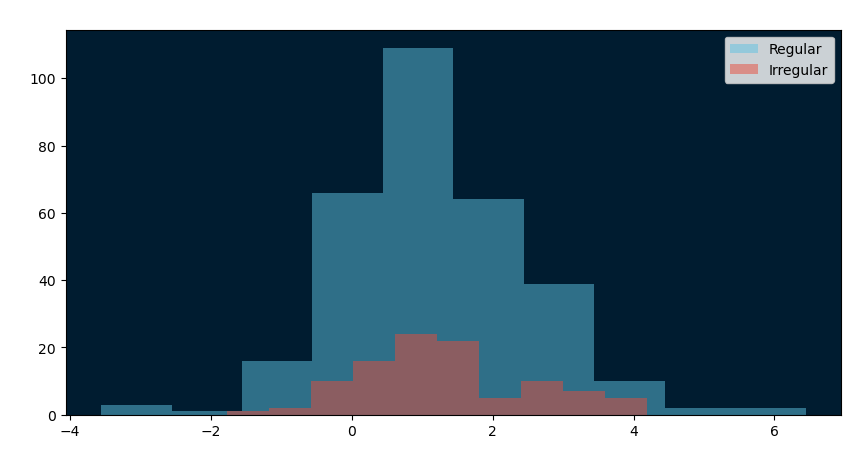

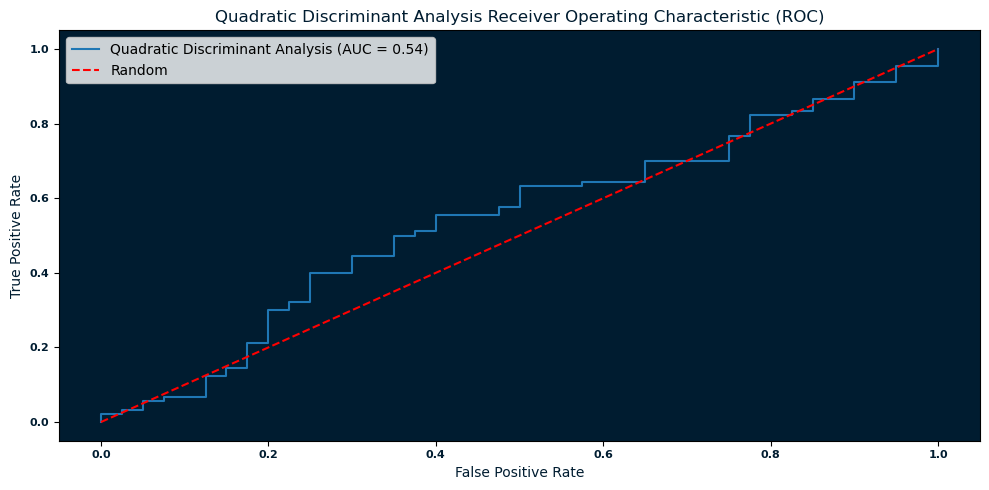

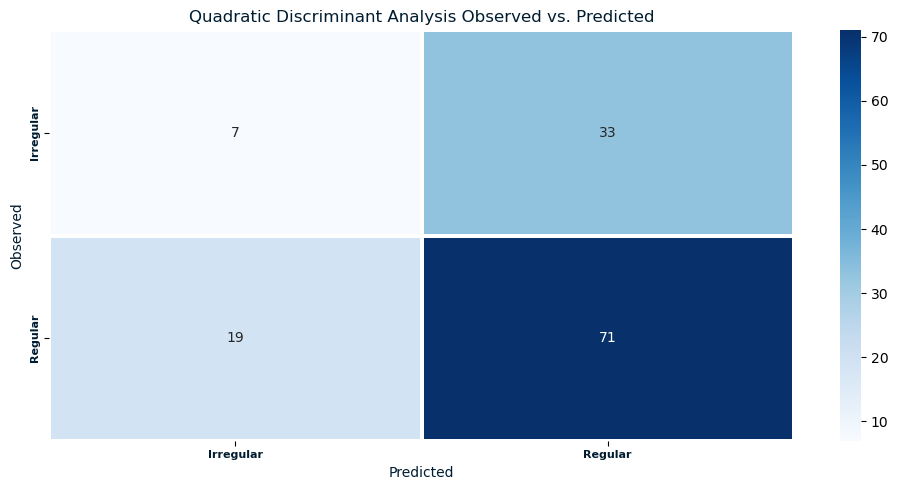

  Model Evaluation:
	Accuracy: 60.0 %
	Sensitivity: 78.88888888888889 %
	Precision: 68.26923076923077 %

 Comparing Models
	Classification Accuracy:
	Logistic Regression: 60.0 %
	Support Vector Machine: 69.23076923076923 %
	Naive Bayes: 60.76923076923077 %
	KNN: 63.84615384615384 %
	CART Tree: 60.76923076923077 %
	Linear Discriminant Analysis: 60.0 %
	Quadratic Discriminant Analysis: 60.0 %
  Best Model to predict Beat Regularity: Support Vector Machine 


In [6]:
mymodel.compare_models()